# INSTALLING LIBRARIES

In [47]:
#Installing packages
install.packages('corrplot')
install.packages('caret')
install.packages('car')

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’




# IMPORTING LIBRARIES

In [48]:
#Importing libraries
library(corrplot)
library(caret)
library(car)

Loading required package: carData



# LOADING DATA

In [3]:
#Loading data
companyDF <-read.csv('https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv')

# DATA SHAPE

In [4]:
#Data shape
dim(companyDF)

[1] 200   4

Note:
- Data have 200 observations and 4 features 

# TOP 10 ROWS OF THE DATA

In [5]:
#Checking top five rows
head(companyDF,10)

,TV,Radio,Newspaper,Sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,12.0
4,151.5,41.3,58.5,16.5
5,180.8,10.8,58.4,17.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8


Note:
- Data have 4 features
- TV, Radio & Newspaper are a Independent Features where as Sales is a Dependent feature

# DATA TYPE

In [6]:
#Checking type of data
str(companyDF)

'data.frame':	200 obs. of  4 variables:
 $ TV       : num  230.1 44.5 17.2 151.5 180.8 ...
 $ Radio    : num  37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6 2.1 2.6 ...
 $ Newspaper: num  69.2 45.1 69.3 58.5 58.4 75 23.5 11.6 1 21.2 ...
 $ Sales    : num  22.1 10.4 12 16.5 17.9 7.2 11.8 13.2 4.8 15.6 ...


Note:
- All features are a numerical type

# DATA SUMMARY

In [7]:
#Describing the data
summary(companyDF)

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  

Note:
- TV feature have mean 147.04, median 149.75, Min 0.70 & Max 296.40
- Radio feature have mean 23.264, median 22.900, Min 0.00 & Max 49.60
- Newspaper feature have mean 30.55, median 25.75, Min 0.30 & Max 114.00
- Sales feature have mean 15.13, median 16.00, Min 1.60 & Max 27.00

# CORRELATION MATRIX

In [8]:
#Computing correlation matrix
cor(companyDF)

,TV,Radio,Newspaper,Sales
TV,1.00000000,0.05480866,0.05664787,0.9012079
Radio,0.05480866,1.00000000,0.35410375,0.3496311
Newspaper,0.05664787,0.35410375,1.00000000,0.1579600
Sales,0.90120791,0.34963110,0.15796003,1.0000000


# CORRELATION MATRIX PLOT

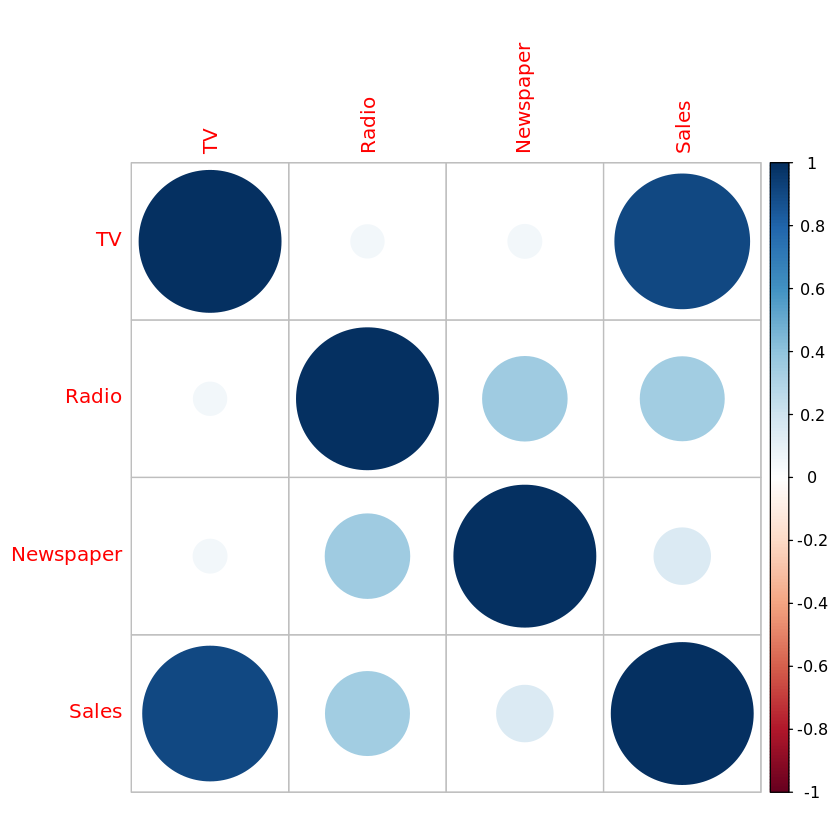

In [9]:
#Visualize the correlation matrix
corrplot(cor(companyDF))

In [10]:
#Each features correlation with target feature
cor(companyDF[,1:3], companyDF$Sales)

TV,0.9012079
Radio,0.3496311
Newspaper,0.1579600


Note:
- TV and Sales have very high correlation 0.9012079
- Radio and Newspaper features are very less correlation i.e have less than 0.5 correlation

# BOX PLOT ON ALL FEATURES

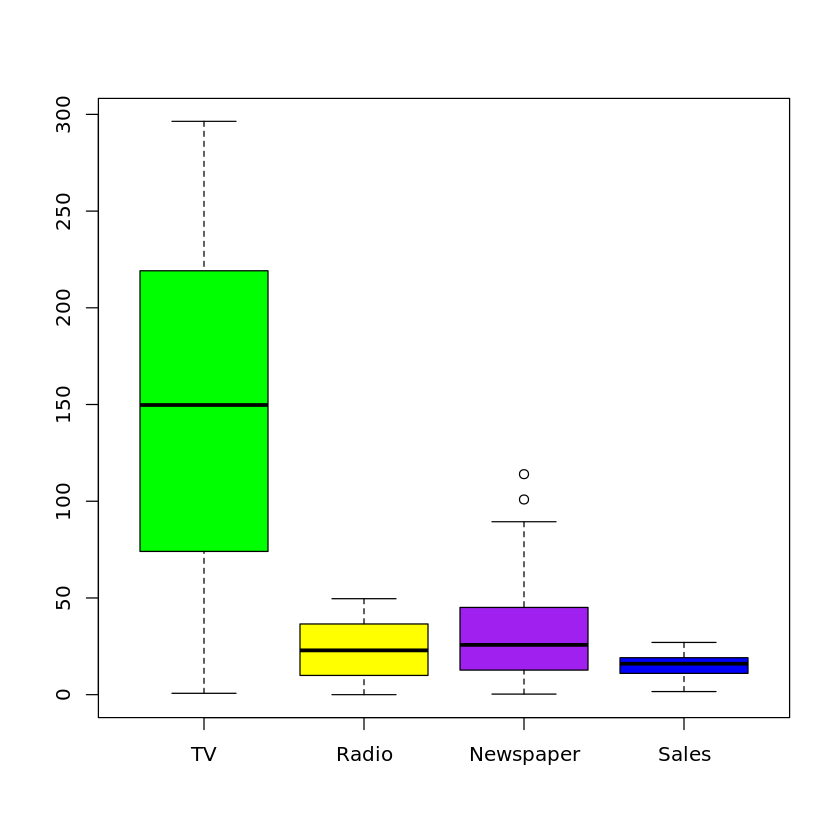

In [11]:
#Creating boxplot on each features
boxplot(companyDF, col = c("green","yellow","purple", "blue"))

Note:
- TV Boxplot is much higher/bigger than Radio & Newspaper
- Radio & Newspaper have comparatively short boxplot as compared to TV Boxplot

# DISTRIBUTION PLOT ON ALL FEATURES

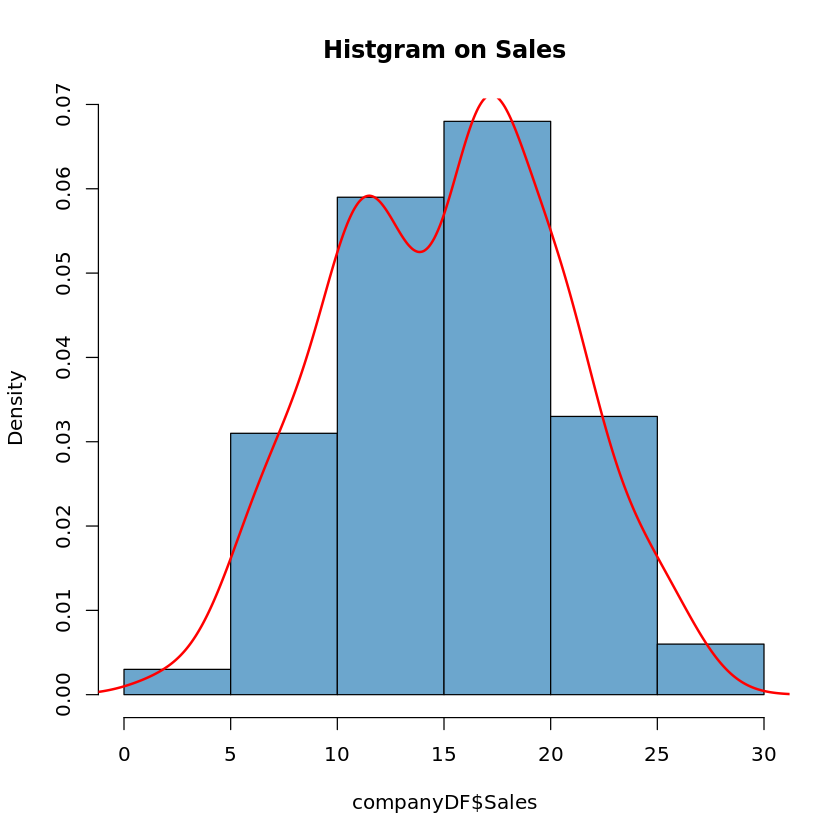

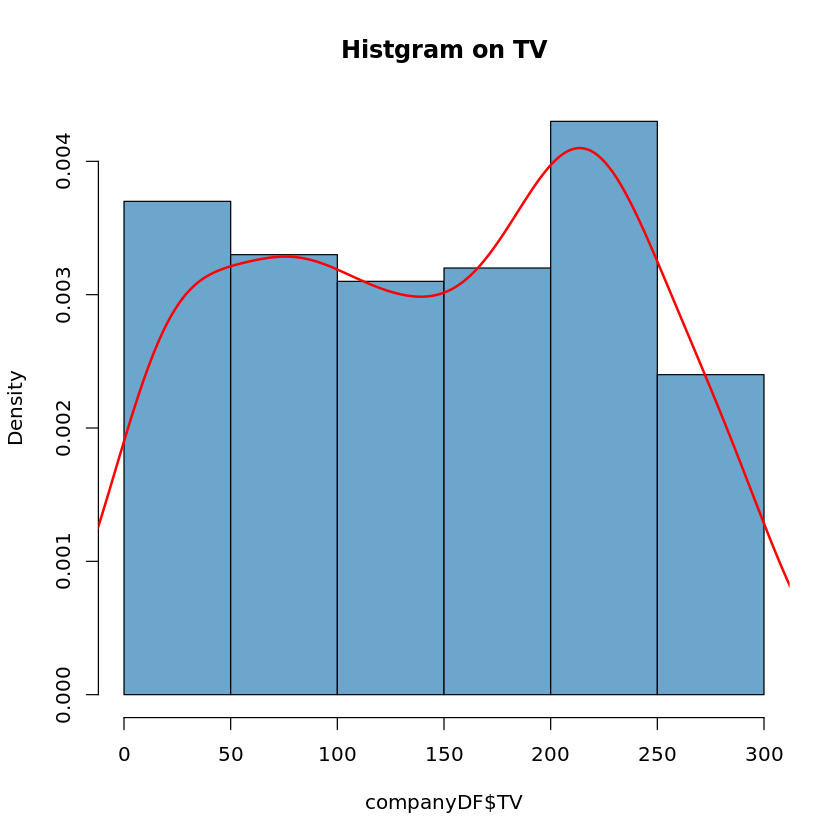

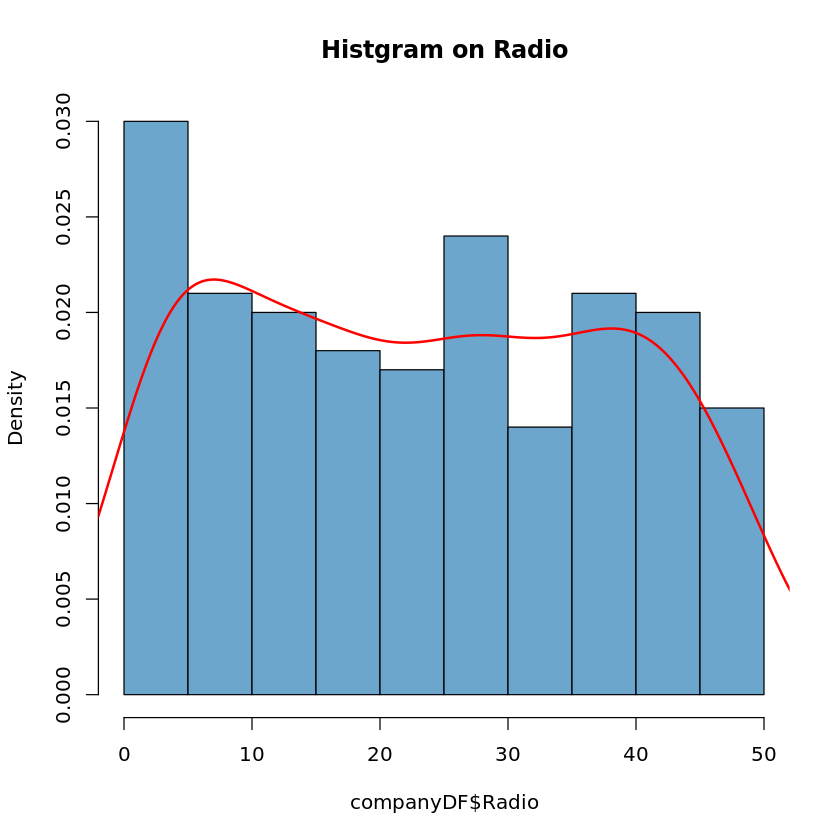

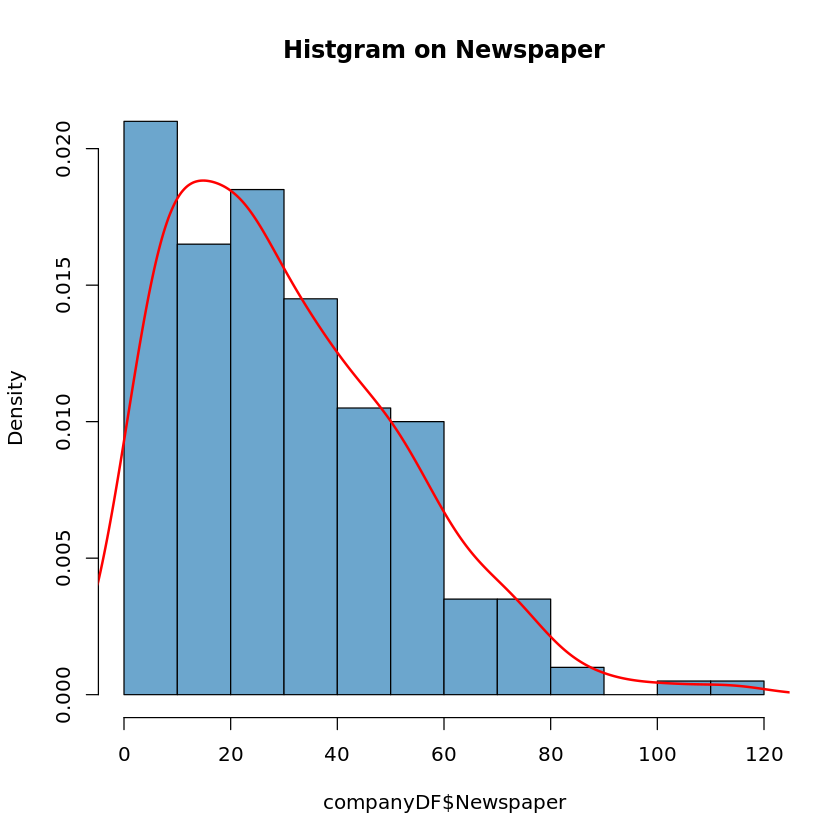

In [12]:
#Creating distribution plot on all the features
layout(matrix(c(1,2), 1, 1, byrow = T))  

hist(companyDF$Sales, 
     freq = F, 
     main = "Histgram on Sales",
     col = 'skyblue3')
density_sales = density(companyDF$Sales)
lines(density_sales, 
      lwd = 2, 
      col = "red")

hist(companyDF$TV, 
     freq = F, 
     main = "Histgram on TV",
     col = 'skyblue3')
density_tv = density(companyDF$TV)
lines(density_tv, 
      lwd = 2, 
      col = "red")


hist(companyDF$Radio, 
     freq = F, 
     main = "Histgram on Radio",
     col = 'skyblue3')
density_radio = density(companyDF$Radio)
lines(density_radio, 
      lwd = 2, 
      col = "red")

hist(companyDF$Newspaper, 
     freq = F, 
     main = "Histgram on Newspaper",
     col = 'skyblue3')
density_newspaper = density(companyDF$Newspaper)
lines(density_newspaper, 
      lwd = 2, 
      col = "red")

Note:
- Sales is seem to be a normal distribution
- Newspaper have right skewed data distribution
- TV & Radio also not seems to be a normal distributed

# MISSING VALUES

In [13]:
#Checking missing values
sum(is.na(companyDF))

[1] 0

Note:
- There is no missing values found in the data

# PAIR PLOT ON ALL FEATURES

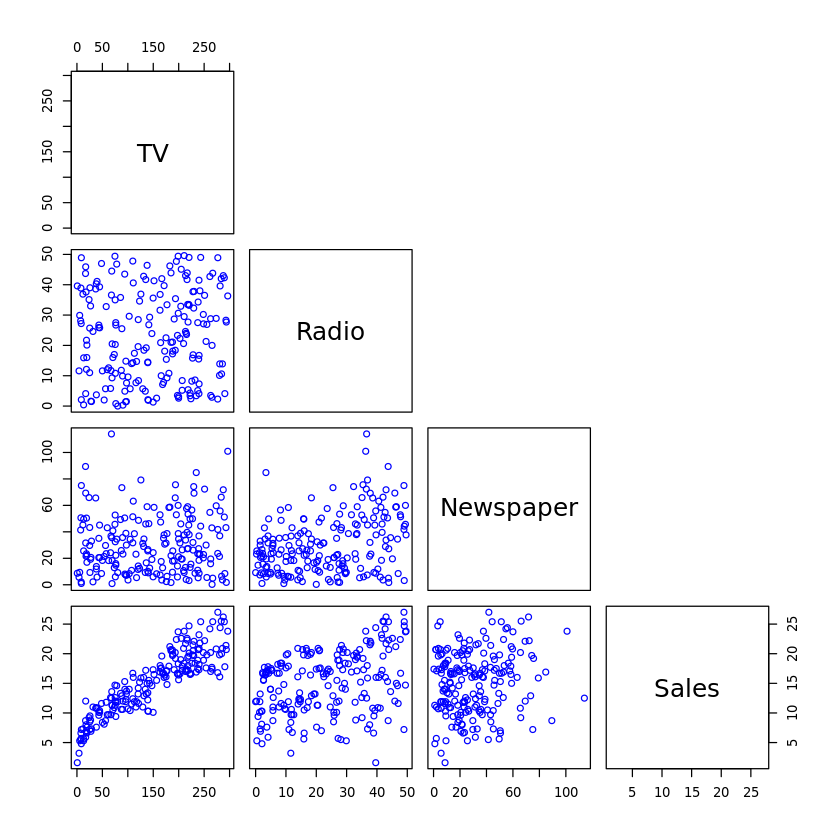

In [14]:
#Creating pair plot
pairs(companyDF, col = 'blue', upper.panel = NULL)

# PAIR PLOT OF SALES WITH TV, RADIO & NEWSPAPER 

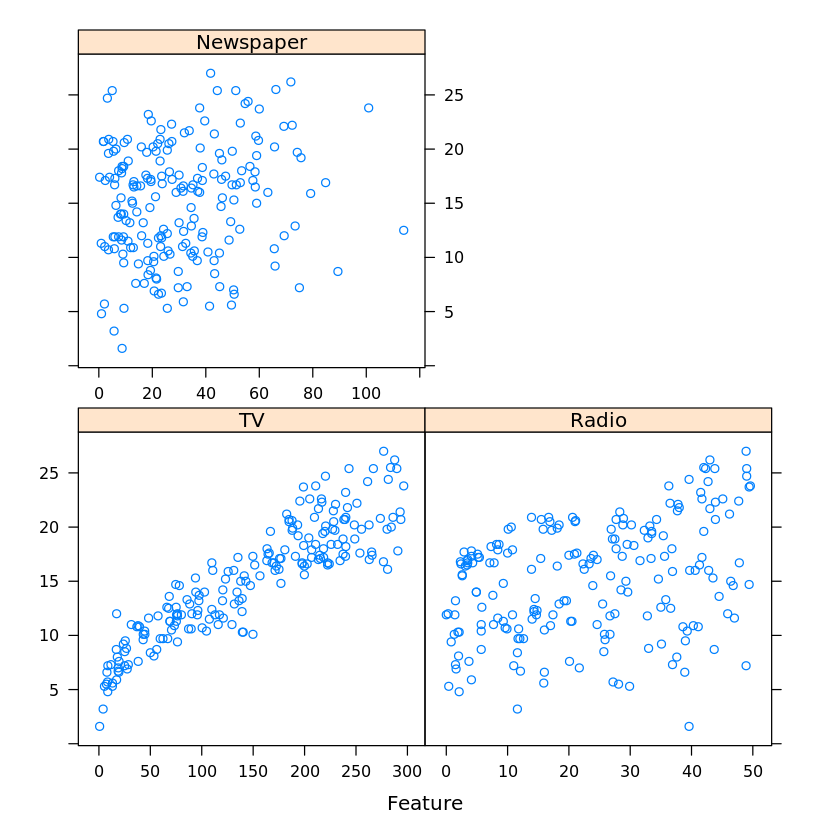

In [15]:
#Pairplot of Sales with TV, Radio & Newspaper
featurePlot(x = companyDF[ , c("TV", "Radio", "Newspaper")], y = companyDF$Sales)

Note:
- TV and Sales have upward trend
- Newspaper and Radio with Sales does not have any upward or down ward trend

# SCENARIO 1

### CREATING LINEAR REGRESSION MODEL 1 ON ALL THE DATA SET

In [16]:
#Creating linear regression model
lm1 = lm(Sales~TV, data=companyDF)

### MODEL 1 SUMMARY

In [17]:
#Model summary
summary(lm1)


Call:
lm(formula = Sales ~ TV, data = companyDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4438 -1.4857  0.0218  1.5042  5.6932 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.974821   0.322553   21.62   <2e-16 ***
TV          0.055465   0.001896   29.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.296 on 198 degrees of freedom
Multiple R-squared:  0.8122,	Adjusted R-squared:  0.8112 
F-statistic: 856.2 on 1 and 198 DF,  p-value: < 2.2e-16


### INTERCEPT AND SLOP OF THE MODEL 1

In [18]:
#Showing slop and intercept w.r.t TV
lm1$coefficients

(Intercept)          TV 
 6.97482149  0.05546477

Note:
- Regression equation is 6.9748214882299 + (0.0554647704695589*Sales)

### PREDICTING ON THE MODEL 1

In [19]:
#Prediction
pred_Sales_1 = predict(lm1)
head(pred_Sales_1)

1         2         3         4         5         6 
19.737265  9.443004  7.928816 15.377734 17.002852  7.457365

### EVALUATE THE MODEL PERFORMANCE

In [20]:
#Computing R2 or Coefficient of Determination
summary(lm1)$r.squared

[1] 0.8121757

In [21]:
#Computing mean squared error
mean(lm1$residuals^2)

[1] 5.217744

In [22]:
#Computing root mean squared error
sqrt(mean(lm1$residuals^2))

[1] 2.284238

Note:
- Model have 81.21% accuracy, 5.21 average squared error & 2.28 average error

# SCENARIO 2

### SPLITTING DATA INTO 70% - 30%

In [23]:
#Splitting the data into train and test on the ratio of 70%-30%
companyDF_TV_Sales <- companyDF[,c('TV','Sales')]
n = nrow(companyDF_TV_Sales)
trainIndex = sample(1:n, size = round(0.7*n), replace=FALSE)
train = companyDF_TV_Sales[trainIndex ,]
test = companyDF_TV_Sales[-trainIndex ,]

### TRAIN AND TEST DATA SHAPE

In [24]:
#Train and Test data shape
print(dim(train))
print(dim(test))

[1] 140   2
[1] 60  2


Note:
- We have splitted data into 70% - 30% which is 140 observations using for training a model and 60 observations are using for testing/validating the model performance

### CREATING LINEAR REGRESSION MODEL 2 ON TRAIN DATA SET

In [25]:
#Creating linear regression model
lm2 = lm(Sales~TV, data = train)
summary(lm2)


Call:
lm(formula = Sales ~ TV, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5389 -1.4824  0.0095  1.4530  5.7393 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.767663   0.371041   18.24   <2e-16 ***
TV          0.056275   0.002198   25.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.246 on 138 degrees of freedom
Multiple R-squared:  0.826,	Adjusted R-squared:  0.8248 
F-statistic: 655.3 on 1 and 138 DF,  p-value: < 2.2e-16


### INTERCEPT AND SLOP OF THE MODEL 2¶

In [26]:
#Showing slop and intercept w.r.t TV
lm2$coefficients

(Intercept)          TV 
 6.76766307  0.05627464

Note:

Regression equation is 6.76 + (0.056*Sales)

### PREDICTING ON  TEST DATA USING MODEL 2

In [27]:
#Predicting on test data
pred_Sales = predict(lm2, newdata = test)
head(pred_Sales)

3         5         8        13        17        18 
 7.735587 16.942118 13.531875  8.107000 10.583084 22.603347

### EVALUATE THE MODEL 2 PERFORMANCE

In [28]:
#Computing mean squared error
mean(lm2$residuals^2)

[1] 4.973785

In [29]:
#Computing R2 or Coefficient of Determination
summary(lm2)$r.squared

[1] 0.8260491

In [30]:
#Computing root mean squared error
sqrt(mean(lm2$residuals^2))

[1] 2.230198

Note:
- Model have 81.46% accuracy, 4.97 average sqaured error & 2.21 average error

# SCENARIO 3

### TRAIN AND TEST DATA SHAPE

In [33]:
#Splitting the data into train and test on the ratio of 70%-30%
n = nrow(companyDF)
trainIndex2 = sample(1:n, size = round(0.7*n), replace=FALSE)
train2 = companyDF[trainIndex2 ,]
test2 = companyDF[-trainIndex2 ,]

In [34]:
#Train and Test data shape
print(dim(train2))
print(dim(test2))

[1] 140   4
[1] 60  4


### CREATING LINEAR REGRESSION MODEL 3 ON TRAIN DATA SET

In [35]:
#Creating linear regression model
lm3 = lm(Sales~TV + Radio + Newspaper, data = train2)
summary(lm3)


Call:
lm(formula = Sales ~ TV + Radio + Newspaper, data = train2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2868 -0.8347  0.1002  0.8256  3.9660 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.298396   0.393656  10.919   <2e-16 ***
TV          0.055035   0.001770  31.101   <2e-16 ***
Radio       0.114596   0.010533  10.880   <2e-16 ***
Newspaper   0.001368   0.007246   0.189    0.851    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.764 on 136 degrees of freedom
Multiple R-squared:  0.8917,	Adjusted R-squared:  0.8893 
F-statistic: 373.3 on 3 and 136 DF,  p-value: < 2.2e-16


### INTERCEPT AND SLOP OF THE MODEL 3

In [36]:
#Showing slop and intercept w.r.t TV, Radio, Newspaper
lm3$coefficients

(Intercept)          TV       Radio   Newspaper 
4.298396255 0.055034876 0.114596248 0.001368325

Note:
- Regression equation is 4.29 + (0.055*Sales) + (0.11*Sales) + (0.00136*Sales)

### PREDICTING ON TEST DATA USING MODEL 3

In [37]:
#Predicting on test data
pred_Sales2 = predict(lm3, newdata = test2)
head(pred_Sales2)

2         6         8         9        13        15 
11.312792 10.483581 13.175547  5.013717  9.720727 19.364174

### EVALUATE THE MODEL 3 PERFORMANCE

In [38]:
#Computing mean squared error
mean(lm3$residuals^2)

[1] 3.022995

In [39]:
#Computing R2 or Coefficient of Determination
summary(lm3)$r.squared

[1] 0.8917054

In [40]:
#Computing root mean squared error
sqrt(mean(lm3$residuals^2))

[1] 1.738676

Note:

Model have 89.17% accuracy, 3.022 average sqaured error & 1.73 average error

# PLOTING BOTH THE MODEL 1 & 2 FIT LINE

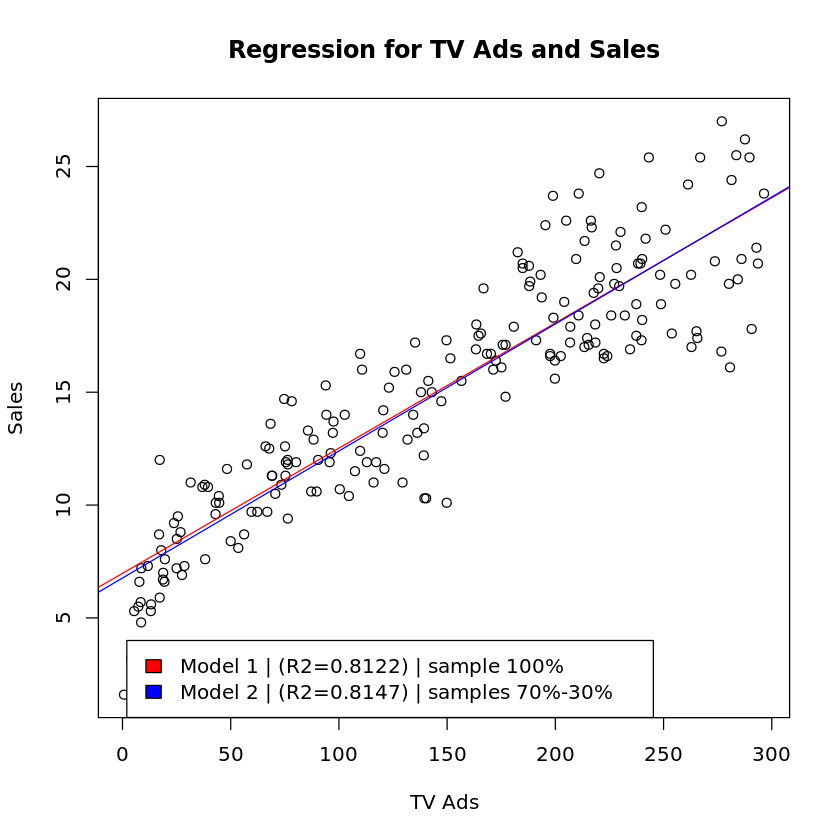

In [43]:
plot(companyDF$TV,
     companyDF$Sales,
     main='Regression for TV Ads and Sales',
     xlab='TV Ads',
     ylab='Sales')
  
# plot a regression line
abline(lm(Sales~TV,data=companyDF),col='red')
abline(lm(Sales~TV,data=train),col='blue')

legend(2, 4, legend=c("Model 1 | (R2=0.8122) | sample 100%", 
                      "Model 2 | (R2=0.8147) | samples 70%-30%"), 
       fill = c("red","blue"))

Note:
- Regression lines from model 1 & model 2 have same trend with minor difference

# PLOTING  MODEL 3 FIT LINE FOR ALL FEATURES

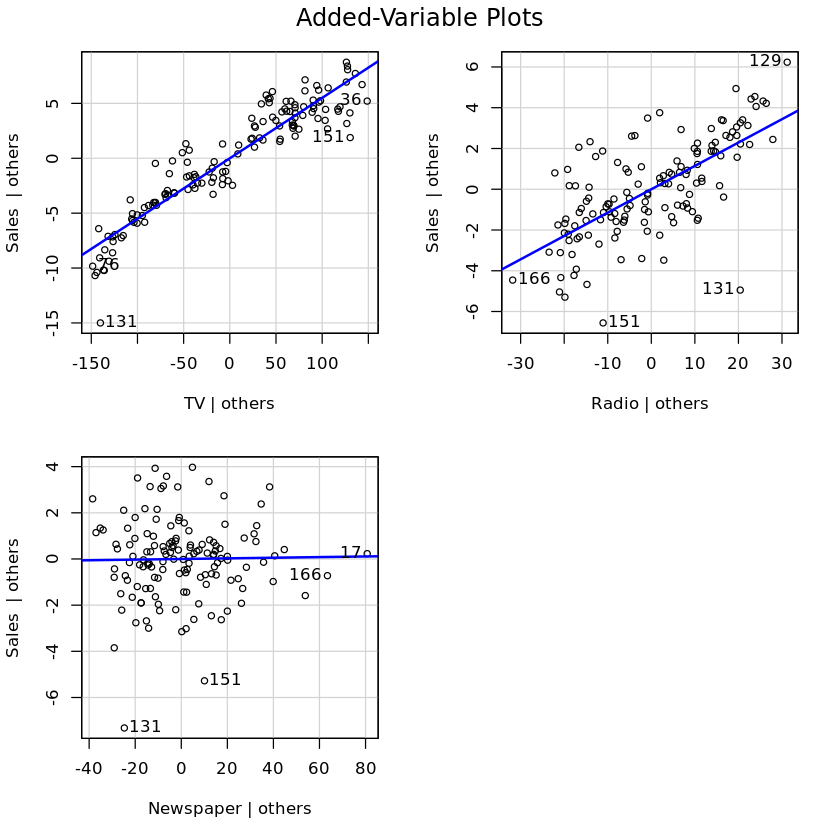

In [51]:
#Plotting best fit line for all the features
avPlots(lm3)

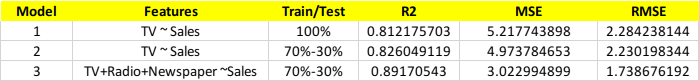

Note:
- Model 3 performing better than model 1 & 2
- Model 3 have less error as compared to model 1 & 2 error
- Model 3 is the best model

# END